In [1]:
# Importing the necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
import pandas as pd
from textblob import TextBlob
import math

In [2]:
# Loading data files
# Trump inaugural speech
trump = "data/trump-r-2017.txt"

# Obama inaugural Speech
obama = "data/obama-d-2013.txt"

# Bush inaugural speech
bush = "data/bush-r-2001.txt"

# Regan inaugural speech
reagan = "data/regan-r-1981.txt"

# Kennedy inaugural speech
kennedy = "data/kennedy-d-1961.txt"

# Roosevelt 3rd inaugural speech
roosevelt = "data/roosevelt-d-1941.txt"

In [3]:
# Read txt file and store
with open(trump, 'r') as file:
    trump_txt = file.read().replace('\n', '')
    
with open(obama, 'r') as file:
    obama_txt = file.read().replace('\n', '')
    
with open(bush, 'r') as file:
    bush_txt = file.read().replace('\n', '')
    
with open(reagan, 'r') as file:
    reagan_txt = file.read().replace('\n', '')
    
with open(kennedy, 'r') as file:
    kennedy_txt = file.read().replace('\n', '')
    
with open(roosevelt, 'r') as file:
    roosevelt_txt = file.read().replace('\n', '')

In [4]:
democrats = ["obama", "kennedy", "roosevelt"]
republican = ["trump", "reagan", "bush"]

# Create dictionary of all text
text = {"trump": trump_txt,
        "obama": obama_txt,
        "bush": bush_txt,
        "reagan": reagan_txt,
        "kennedy": kennedy_txt, 
        "roosevelt": roosevelt_txt}

### Number of Sentences, words, character in the document

In [ ]:
import nltk
nltk.download('punkt')

In [6]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer

In [7]:
def count_doc(text):
    
    sentence_len = []
    word_len = []
    char_len = []
    names = []
    party = []
    speech_text = []
    
    for k, v in text.items():
        
        sent_token = sent_tokenize(v)
        # Using regex tokenizer because nltk word toknizer considering punctuation as words
        word_token = RegexpTokenizer(r'\w+').tokenize(v)
        char = v.translate(str.maketrans('', '', string.punctuation))
        
        sentence_len.append(len(sent_token))
        word_len.append(len(word_token))
        char_len.append(len(char))
        names.append(k)
        if k in democrats:
            party.append("Democrates")
        else:
            party.append("Republican")
        speech_text.append(v)
    
    d = {"name": names,
         "speech_text": speech_text,
         "sentence_length": sentence_len,
         "word_length": word_len,
         "char_length": char_len,
         "party": party}
    
    
    df = pd.DataFrame(d)
    
    return df

In [8]:
df = count_doc(text)

In [9]:
df

,name,speech_text,sentence_length,word_length,char_length,party
0,trump,"Chief Justice Roberts, President Carter, Presi...",59,1468,8158,Republican
1,obama,Thank you. Thank you so much.Vice President Bi...,63,2125,11659,Democrates
2,bush,"Thank you, all. Chief Justice Rehnquist, Presi...",68,1602,8758,Republican
3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",99,2454,13296,Republican
4,kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",30,1368,7316,Democrates
5,roosevelt,On each national day of Inauguration since 178...,38,1362,7370,Democrates


In [10]:
# set size of the chart
sns.set(rc={"figure.figsize":(30, 10)})

<AxesSubplot:xlabel='name', ylabel='char_length'>

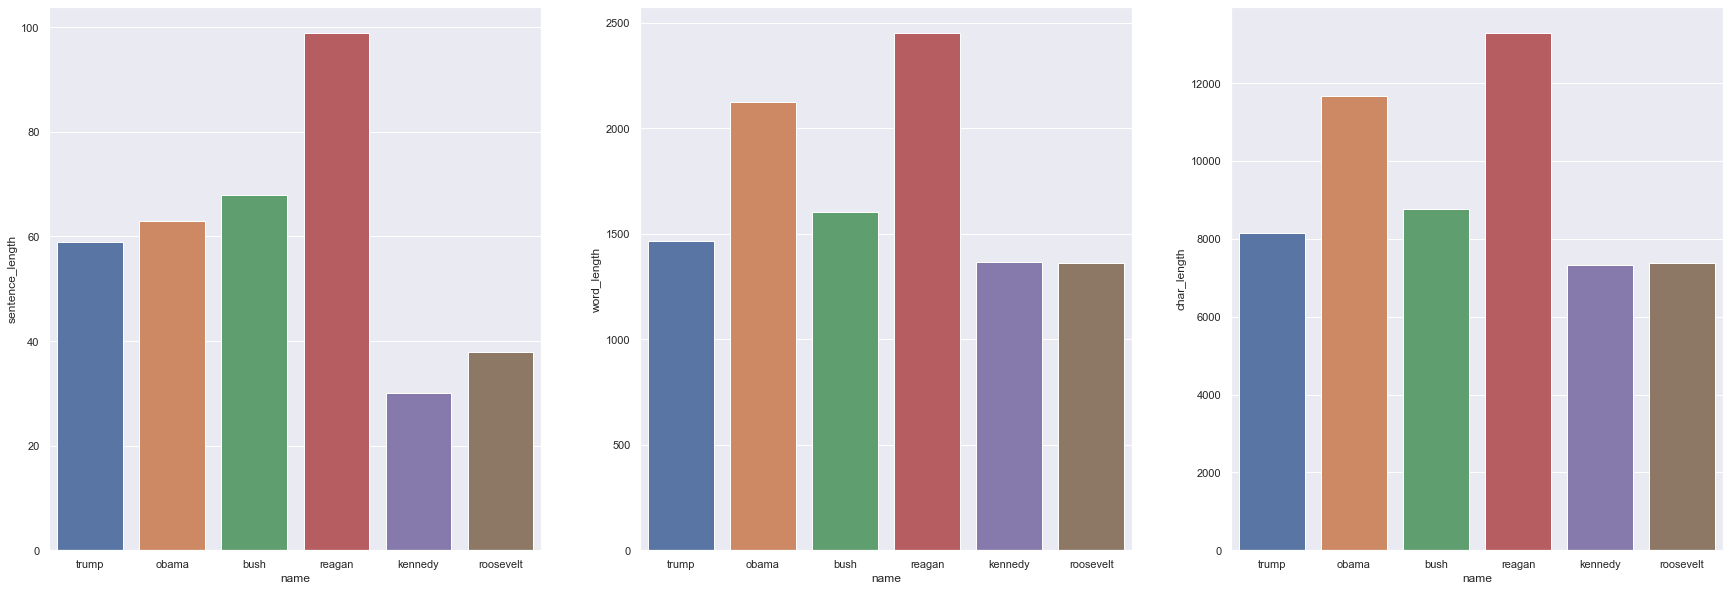

In [11]:
f, axes = plt.subplots(1, 3)
# Sentence count
sns.barplot(x="name", y="sentence_length", data=df, ax=axes[0])
# Word count
sns.barplot(x="name", y="word_length", data=df, ax=axes[1])
# Char count
sns.barplot(x="name", y="char_length", data=df, ax=axes[2])

Kennedy and Roosevelt speech length is less compared to the other president's inaugural speech.

### Word Cloud

In [12]:
# Word cloud for Trump
# To generate word cloud we are using word cloud python package and removing stop words during the process
trump_word_cloud = WordCloud(width= 3000, height = 2000,random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(trump_txt)

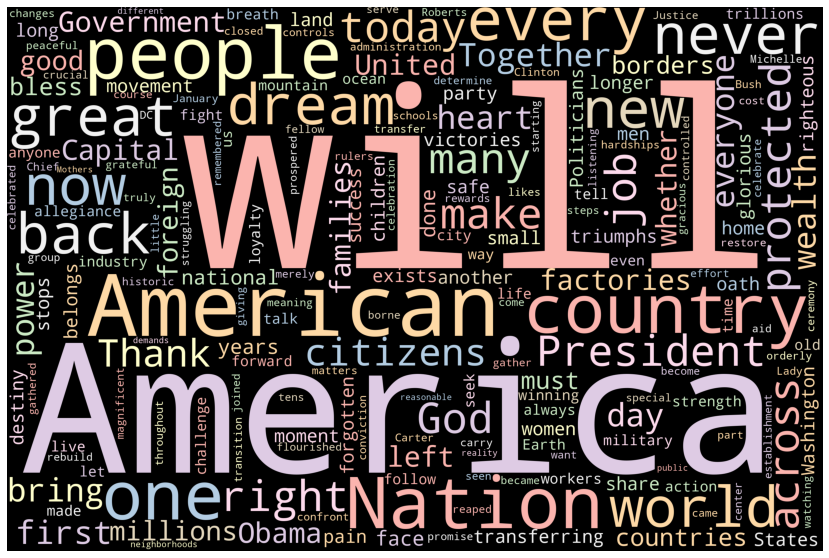

In [13]:
plt.axis("off")
plt.imshow(trump_word_cloud)

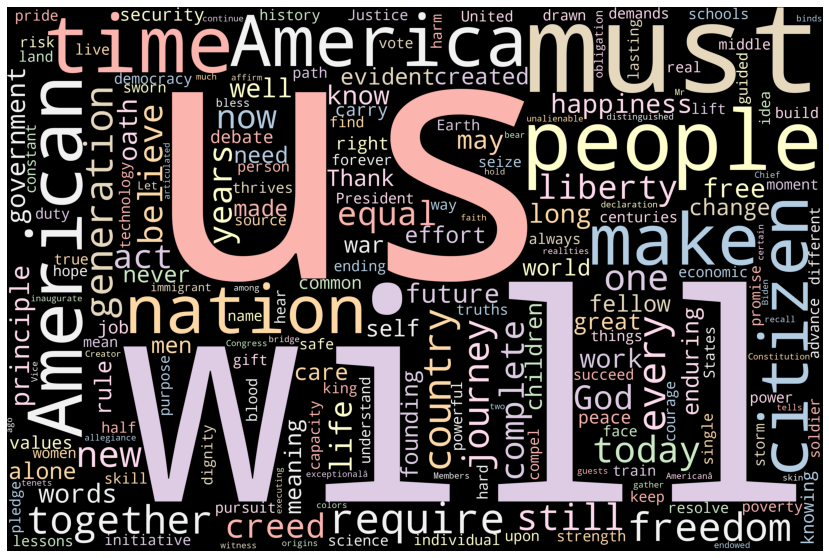

In [14]:
# Word cloud for Obama

obama_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(obama_txt)

plt.axis("off")
plt.imshow(obama_word_cloud)

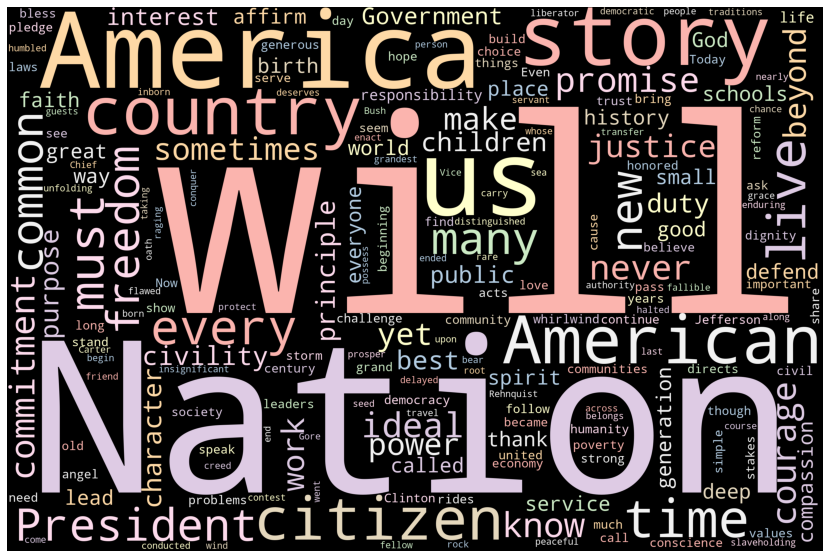

In [15]:
# Word cloud for bush

bush_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(bush_txt)

plt.axis("off")
plt.imshow(bush_word_cloud)

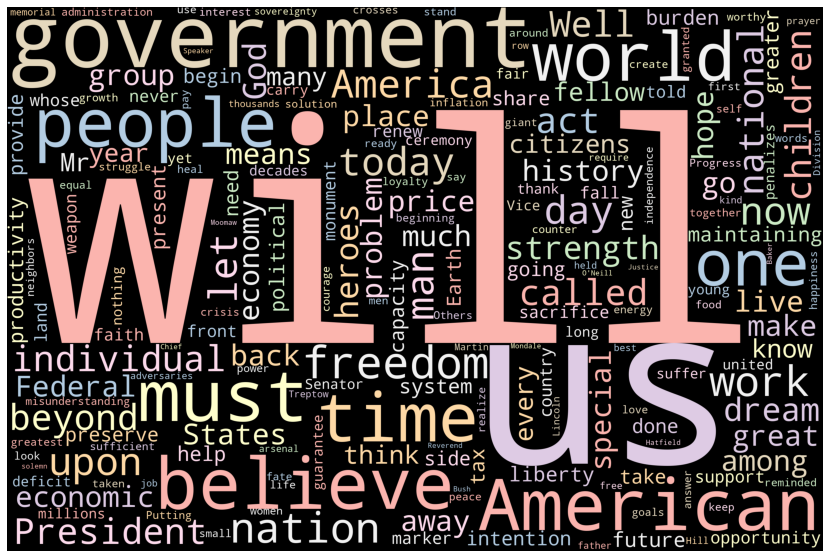

In [16]:
# Word cloud for reagan

reagan_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(reagan_txt)

plt.axis("off")
plt.imshow(reagan_word_cloud)

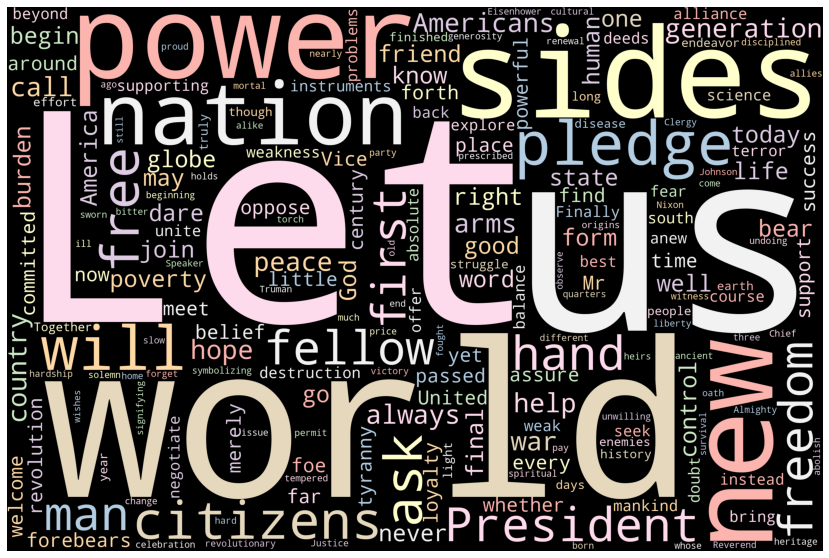

In [17]:
# Word cloud for kennedy

kennedy_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(kennedy_txt)

plt.axis("off")
plt.imshow(kennedy_word_cloud)

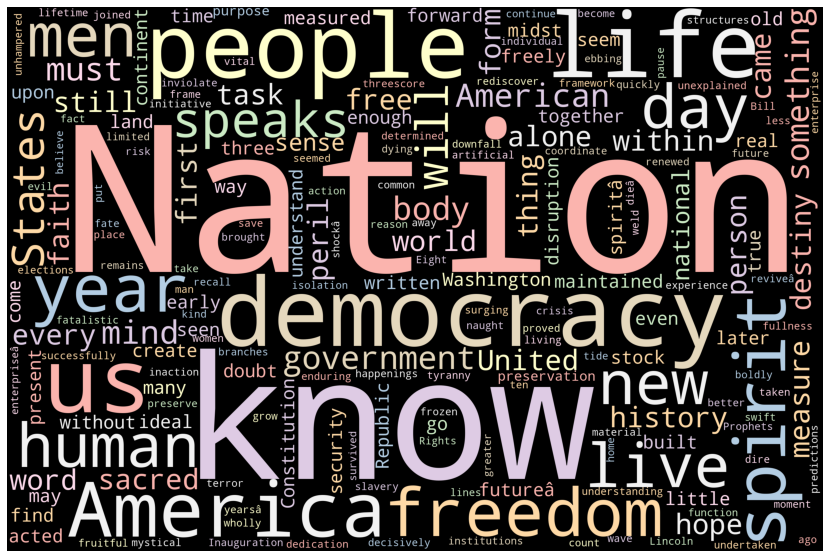

In [18]:
# Word cloud for Roosevelt

roosevelt_word_cloud = WordCloud(width= 3000, height = 2000,
                              random_state=1,
                              colormap='Pastel1',
                              collocations=False, 
                              stopwords = STOPWORDS).generate(roosevelt_txt)

plt.axis("off")
plt.imshow(roosevelt_word_cloud)

### Sentiment Analysis

In [19]:
# Stop words
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Regular expression Get only words.
WORD = re.compile(r"\w+")

In [20]:
def sentiment_analysis(speech_text):
    """
        Sentiment polority calculation based on text blob library, the output result range from [-1,1] 
        where -1 is negative polarity and 1.0 is positive polarity.score also can be 0, which stands for a neutral evaluation.
    """
    sentiment = []
    
    # Remove punctuation
    speech_text = speech_text.lower()
    word_list = WORD.findall(speech_text) # applying regular expression and get only text data
    
    for words in word_list:
        #determine the sentiment polarity score for each sentance
        polarity = TextBlob(words).sentiment.polarity
        
        #append the sentiment score only if it does not = 0
        if polarity != 0.0:
            sentiment.append(polarity)
            
        #take the average of all of the lines in the passage
            avg_sentiment = sum(sentiment)/ len(sentiment)
    
    return avg_sentiment

In [21]:
# using pandas apply method to calculate sentiment score on speech text
df["sentiment"] = df.apply(lambda row: sentiment_analysis(row["speech_text"]), axis=1)

In [22]:
df

,name,speech_text,sentence_length,word_length,char_length,party,sentiment
0,trump,"Chief Justice Roberts, President Carter, Presi...",59,1468,8158,Republican,0.236597
1,obama,Thank you. Thank you so much.Vice President Bi...,63,2125,11659,Democrates,0.179180
2,bush,"Thank you, all. Chief Justice Rehnquist, Presi...",68,1602,8758,Republican,0.240343
3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",99,2454,13296,Republican,0.277070
4,kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",30,1368,7316,Democrates,0.189337
5,roosevelt,On each national day of Inauguration since 178...,38,1362,7370,Democrates,0.198880


<AxesSubplot:xlabel='name', ylabel='sentiment'>

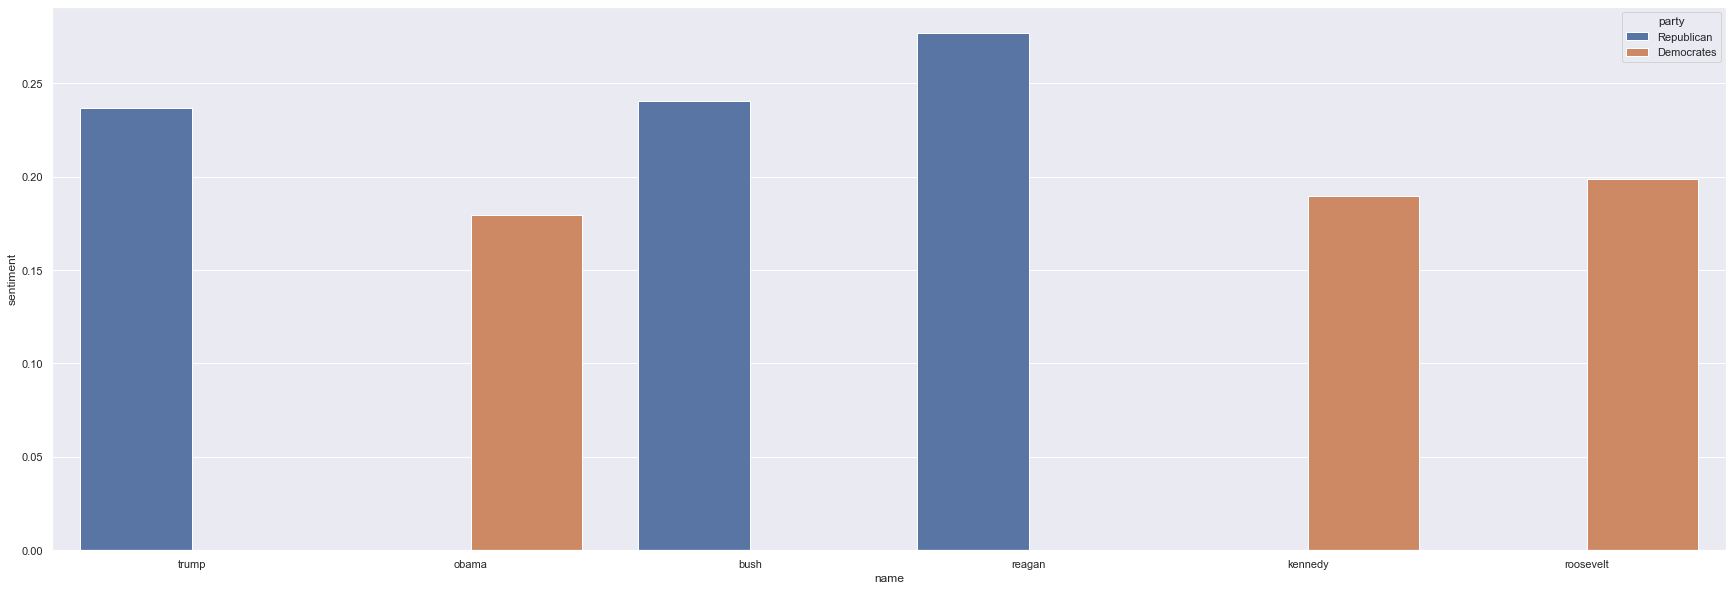

In [23]:
sns.barplot(x="name", y="sentiment", data=df, hue="party")

Based on above plot, the repulican candidated have on average higher sentiment score than democratic. The above observation based on only 6 presedient speeh. we can't establish if their is a real correlation between political party and speech sentiment

### Most common words

In [24]:
def most_used_word(speech_text):
    
    """
    Take a string and return most used word that character length more than 4
    """
    
    # Removing non-text value, convert text into lower case and save it in list
    clean_speech = re.sub('[^\w\s]','',speech_text).lower().split()
    
    # Checking length of the character
    new_words = [word for word in clean_speech if len(word)>3]
    
    word_list = []
    for word in new_words: 
        if word not in stop_words: # Check if the word is stop word or not
            word_list.append(word)
    
    # counting the words using counter and return as counter object
    d = Counter(new_words).most_common(100)
    
    # save only the words
    common_words = [tpl[0] for tpl in d]
    
    return common_words

In [25]:
# using pandas apply method to calculate sentiment score on speech text
df["most_used_word"] = df.apply(lambda row: most_used_word(row["speech_text"]), axis=1)

In [26]:
df

,name,speech_text,sentence_length,word_length,char_length,party,sentiment,most_used_word
0,trump,"Chief Justice Roberts, President Carter, Presi...",59,1468,8158,Republican,0.236597,"[will, america, their, from, your, american, p..."
1,obama,Thank you. Thank you so much.Vice President Bi...,63,2125,11659,Democrates,0.179180,"[that, will, must, with, this, those, these, f..."
2,bush,"Thank you, all. Chief Justice Rehnquist, Presi...",68,1602,8758,Republican,0.240343,"[will, that, this, with, country, story, citiz..."
3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",99,2454,13296,Republican,0.277070,"[that, will, this, have, with, government, tho..."
4,kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",30,1368,7316,Democrates,0.189337,"[that, this, both, sides, which, from, those, ..."
5,roosevelt,On each national day of Inauguration since 178...,38,1362,7370,Democrates,0.198880,"[that, this, nation, know, have, from, because..."


In [27]:
def common_word_between_presidents(used_word_array):
    
    '''
        Takes input of array of common words and return list of list contain integers
    '''
    
    trump = []
    obama = []
    bush  = []
    reagan = []
    kennedy = []
    roosevelt =[] # initialize array
    count_list = [trump, obama, bush, reagan, kennedy, roosevelt]
    
    for i in used_word_array:
        for j in range(len(used_word_array)):
            # len of words contained in 2 presdient most used word list
            count_list[j].append(len(set(i) & set(used_word_array[j])))
    
    return count_list

In [28]:
v = common_word_between_presidents(df["most_used_word"].values)

<AxesSubplot:>

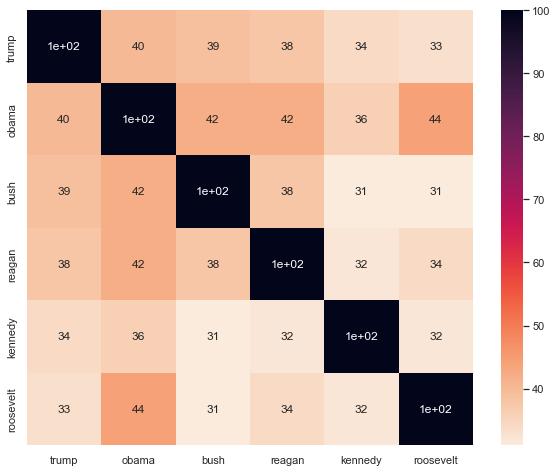

In [29]:
# set size of the chart
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(data = v, xticklabels = df['name'].values, cbar=True, yticklabels = df['name'].values, cmap="rocket_r", annot=True)

### Subjectivity

In [30]:
def subjectivity_analysis(speech_text):
    """
        Subjectivity/objectivity give result in range [0.0-1.0] where 0.0 is very objective sentence and 1.0 is very subjective sentence.
    """
    subjectivity_score = []
    
    # Remove punctuation
    speech_text = speech_text.lower()
    word_list = WORD.findall(speech_text) # applying regular expression and get only text data
    
    for words in word_list:
        #determine the sentiment polarity score for each sentance
        subjectivity = TextBlob(words).sentiment.subjectivity
        
        #append the sentiment score only if it does not = 0
        if subjectivity != 0.0:
            subjectivity_score.append(subjectivity)
            
        #take the average of all of the lines in the passage
            avg_subjectivity = sum(subjectivity_score)/ len(subjectivity_score)
    
    return avg_subjectivity

In [31]:
# using pandas apply method to calculate subjectivity score on speech text
df["subjectivity"] = df.apply(lambda row: subjectivity_analysis(row["speech_text"]), axis=1)

<AxesSubplot:xlabel='name', ylabel='subjectivity'>

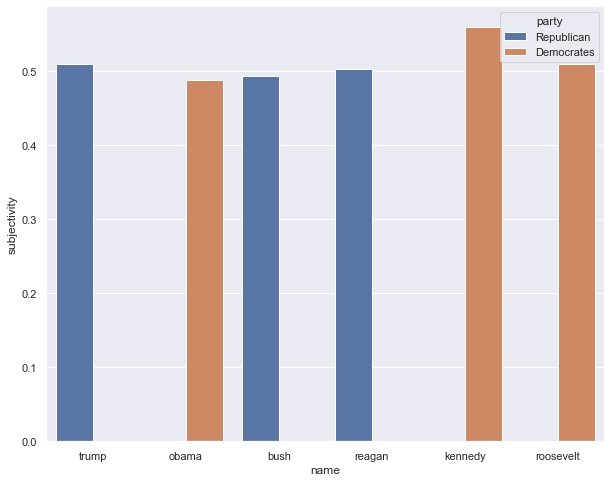

In [32]:
sns.barplot(x="name", y="subjectivity", data=df, hue="party")

Higher the score = more use of subjective language.

### Cosine similarity

One of the technique to find similarity between two text documents is called Cosine similarity.

Similar in terms of what? That's the main question when chooses to find the similarity? Based on word count on both documents or meaning of both documents?

If we took above two features ie word count and how similar to each other and place it on the x and y axis as a vector.

The difference between two vectors forms an angle.

This angle will helps to identify how similar or different are the documents.

0-deg = same 90-deg = opposite to each other

Knowing the angle will tell you how similar the text documents are, but it's better to have placed the value between 0 to 1. that's where the cosine similarity coming into picture.

compute cosine similarity of A to B: (A dot B)/{||A||*||B||)

A & B are vector representation of two text document.

In [33]:
# Calculate cosine similarity
# It will take argument which is vector representation of both document.

def get_cosine(vec1, vec2):

    intersection = set(vec1.keys()) & set(vec2.keys())

    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])

    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [34]:
# Convert text into vector and removing stop words
def text_to_vector(text):
    words = WORD.findall(text) # applying regular expression and get only text data
    word_list = [] # Empty list to store data
    for word in words: 
        if word not in stop_words: # Check if the word is stop word or not
            word_list.append(word)
    
    return Counter(word_list) # Return counter object

In [35]:
# Convert text into vector without removing stop words
def text_to_vector_with_sw(text):
    words = WORD.findall(text)
    return Counter(words)

### Similarity between Trump and bush

In [36]:
# By removing stop word
A = text_to_vector(trump_txt) # convert text into vector
B = text_to_vector(bush_txt)
cosine = get_cosine(A, B)
print("Cosine Similarity Between Trump and Bush(without stopwords):", cosine)

Cosine Similarity Between Trump and Bush(without stopwords): 0.5431217747651396


In [37]:
#Without removing stop word
vector1 = text_to_vector_with_sw(trump_txt)
vector2 = text_to_vector_with_sw(bush_txt)
cosine_sw = get_cosine(vector1, vector2)
print("Cosine Similarity Between Trump and Bush(with stopwords):", cosine_sw)

Cosine Similarity Between Trump and Bush(with stopwords): 0.8747493092490929


### Similarity between Trump and Obama

In [38]:
# By removing stop word
A = text_to_vector(trump_txt) # convert text into vector
B = text_to_vector(obama_txt)
cosine = get_cosine(A, B)
print("Cosine Similarity Between Trump and Obama(without stopwords):", cosine)

Cosine Similarity Between Trump and Obama(without stopwords): 0.55108033132121


In [39]:
#Without removing stop word
vector1 = text_to_vector_with_sw(trump_txt)
vector2 = text_to_vector_with_sw(obama_txt)
cosine_sw = get_cosine(vector1, vector2)
print("Cosine Similarity Between Trump and Obama(with stopwords):", cosine_sw)

Cosine Similarity Between Trump and Obama(with stopwords): 0.8885513213901292


### Similarity between Obama and Roosevelt

In [40]:
# By removing stop word
A = text_to_vector(roosevelt_txt) # convert text into vector
B = text_to_vector(obama_txt)
cosine = get_cosine(A, B)
print("Cosine Similarity Between Trump and Obama(without stopwords):", cosine)

Cosine Similarity Between Trump and Obama(without stopwords): 0.46873805021368303


In [41]:
#Without removing stop word
vector1 = text_to_vector_with_sw(roosevelt_txt)
vector2 = text_to_vector_with_sw(obama_txt)
cosine_sw = get_cosine(vector1, vector2)
print("Cosine Similarity Between Trump and Obama(with stopwords):", cosine_sw)

Cosine Similarity Between Trump and Obama(with stopwords): 0.8584715793841878


### Similarity between Roosevelt and kennedy

In [42]:
# By removing stop word
A = text_to_vector(roosevelt_txt) # convert text into vector
B = text_to_vector(kennedy_txt)
cosine = get_cosine(A, B)
print("Cosine Similarity Between Roosevelt and kennedy(without stopwords):", cosine)

Cosine Similarity Between Roosevelt and kennedy(without stopwords): 0.31833295974628967


In [43]:
#Without removing stop word
vector1 = text_to_vector_with_sw(roosevelt_txt)
vector2 = text_to_vector_with_sw(kennedy_txt)
cosine_sw = get_cosine(vector1, vector2)
print("Cosine Similarity Between Roosevelt and kennedy(with stopwords):", cosine_sw)

Cosine Similarity Between Roosevelt and kennedy(with stopwords): 0.91391359403247


### Top five words

In [44]:
def top_five(speech_text):
    """
        Take input as speech and return most common 5 words
    """
    # Removing non-text value, convert text into lower case and save it in list
    clean_speech = WORD.findall(speech_text)
    word_list = []
    for word in clean_speech: 
        if word not in stop_words: # Check if the word is stop word or not
            word_list.append(word)
    
    d = Counter(word_list).most_common(5)
    final_word = [tpl[0] for tpl in d]
    return final_word

In [45]:
df['top_5_words'] = df.apply(lambda row: top_five(row["speech_text"]), axis=1)

In [46]:
df[['name','top_5_words']].style.hide_index()

name,top_5_words
trump,"['We', 'America', 'American', 'people', 'country']"
obama,"['We', 'us', 'must', 'people', 'time']"
bush,"['And', 'We', 'I', 'America', 'us']"
reagan,"['us', 'I', 'We', 'It', 'government']"
kennedy,"['us', 'world', 'Let', 'let', 'sides']"
roosevelt,"['It', 'Nation', 'The', 'know', 'We']"
